In [9]:
import seaborn as sns

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Display the first few rows of the dataset
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
import pandas as pd
feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data, target = penguins[[feature_name]], penguins[target_name]



In [11]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
import pandas as pd

# Assuming 'data' is your DataFrame with missing values
data = data.fillna(method='ffill')  # Forward fill missing values
target = target.fillna(method='ffill')  # Forward fill missing values


C:\Users\asus\AppData\Local\Temp\ipykernel_14236\1232790644.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values
C:\Users\asus\AppData\Local\Temp\ipykernel_14236\1232790644.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  target = target.fillna(method='ffill')  # Forward fill missing values


In [15]:
linear_regression.fit(data, target)


LinearRegression()

In [16]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.75742954881219

In [17]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5796.971061840105

In [18]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

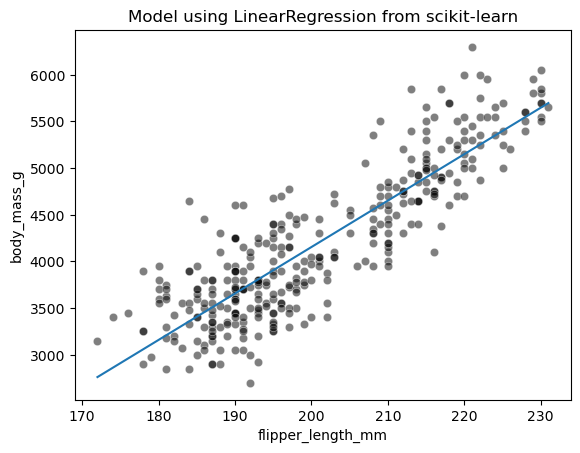

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")


# We can first compute the mean squared error.

In [20]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154917.36


# mean absolute error 

In [21]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.11 g
